<a href="https://colab.research.google.com/github/fraziermatthew/ImageAI/blob/master/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip3 install tensorflow-gpu
!pip3 install numpy
!pip3 install scipy
!pip3 install opencv-python
!pip3 install pillow
!pip3 install matplotlib
!pip3 install h5py
!pip3 install keras

    100% |████████████████████████████████| 281.7MB 84kB/s 


In [3]:
cd /usr/local/src

/usr/local/src


In [0]:
# Import the dependencies
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

# Load the mnist dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print to verify the setup - shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Flatten the image pixels
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

# Convert labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define your model/network
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Compile the function
model.compile(optimizer=SGD(0.013),loss="categorical_crossentropy",metrics=["accuracy"])

# Uncomment both lines during training
# Fit the function
# model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,verbose=1)

# Save the model
# model.save("mnistmodel.h5")

# Comment out this line during training
model.load_weights("mnistmodel.h5")

# Evaluate Accuracy
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])



Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.5644 - acc: 0.8457
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2434 - acc: 0.9288
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1836 - acc: 0.9460
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1484 - acc: 0.9561
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1255 - acc: 0.9632
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1081 - acc: 0.9683
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0947 - acc: 0.9721
Epoch 8/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0835 - acc: 0.9762
Epoch 9/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.07

Class:  5


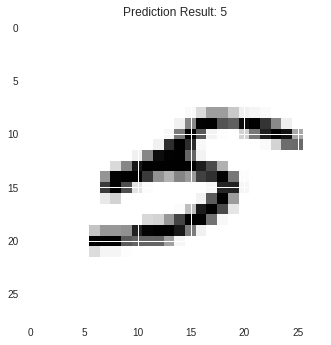

In [0]:
# import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Define the model
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Specify the training components
model.compile(optimizer=SGD(0.01),loss="categorical_crossentropy",metrics=["accuracy"])

# Load the pretrained model
model.load_weights("mnistmodel.h5")

# Normalize the test dataset
test_x = test_x.astype('float32') / 255

# Extract a specific image
img = test_x[167]

# Create a flattened copy of the image
test_img = img.reshape((1,784))

# Predict the class
img_class = model.predict_classes(test_img)
classname = img_class[0]
print("Class: ",classname)

# Display the original non-flattened copy of the image
plt.title("Prediction Result: %s"%(classname))
plt.imshow(img)
plt.show()

In [0]:
!curl -O https://raw.githubusercontent.com/johnolafenwa/Neural-Network-Tutorials/master/basics/testimage.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2918  100  2918    0     0  16770      0 --:--:-- --:--:-- --:--:-- 16770


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  3


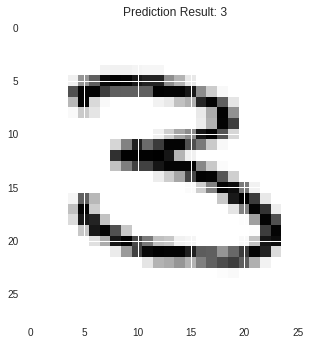

In [0]:
# Import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Define the model
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Specify the training components
model.compile(optimizer=SGD(0.01),loss="categorical_crossentropy",metrics=["accuracy"])

# Load the pretrained model
model.load_weights("mnistmodel.h5")

# Load an image from your system
img = image.load_img(path="testimage.png",grayscale=True,target_size=(28,28))
img = image.img_to_array(img)
img = img.reshape((28,28))

# Create a flattened copy of the image
test_img = img.reshape((1,784))

# Predict the class
img_class = model.predict_classes(test_img)
classname = img_class[0]
print("Class: ",classname)

# Display the original non-flattened copy of the image
plt.title("Prediction Result: %s"%(classname))
plt.imshow(img)
plt.show()

In [0]:
# Import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Flatten the images
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

# Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define the model
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.1
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

# Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

# Specify the training components
model.compile(optimizer=SGD(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

#Fit the model
model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,verbose=1,callbacks=[lr_scheduler])

#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)
Learning Rate:  0.1
Epoch 1/20
Learning Rate:  0.1
60000/60000 [==============================] - 8s 128us/step - loss: 0.2797 - acc: 0.9140
Epoch 2/20
Learning Rate:  0.1
60000/60000 [==============================] - 7s 122us/step - loss: 0.1124 - acc: 0.9655
Epoch 3/20
Learning Rate:  0.1
60000/60000 [==============================] - 7s 123us/step - loss: 0.0798 - acc: 0.9746
Epoch 4/20
Learning Rate:  0.1
60000/60000 [==============================] - 7s 122us/step - loss: 0.0598 - acc: 0.9809
Epoch 5/20
Learning Rate:  0.1
60000/60000 [==============================] - 7s 123us/step - loss: 0.0475 - acc: 0.9847
Epoch 6/20
Learning Rate:  0.1
60000/60000 [==============================] - 7s 124us/step - loss: 0.0375 - acc: 0.9878
Epoch 7/20
Learning Rate:  0.02
60000/60000 [==============================] - 7s 122us/step - loss: 0.0159 - acc: 0.9957
Epoch 8/20
Learning Rate

In [6]:
# Import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Flatten the images
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

# Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define the model
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Print a Summary of the model
model.summary()

# Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.1
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

# Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

# Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'mnistsavedmodels')

# Name of model files
model_name = 'mnistmodel.{epoch:03d}.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 period=1)

# Specify the training components
model.compile(optimizer=SGD(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the model
# model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,verbose=1,callbacks=[checkpoint,lr_scheduler])
# model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])
model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,validation_data=[test_x,test_y],verbose=1,callbacks=[checkpoint,lr_scheduler])

# Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Learning Rate:  0.1
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Learning Rate:  0.1
60000/60000 [==============================] - 8s 127us/ste

In [8]:
# Using the functional API
# Import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Model,Input
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Flatten the images
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

# Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define the model
def MiniModel(input_shape):
  images = Input(input_shape)
  net = Dense(units=128,activation="relu")(images)
  net = Dense(units=128, activation="relu")(net)
  net = Dense(units=128, activation="relu")(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

# Print a Summary of the model
model = MiniModel((784,))
model.summary()

# Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.1
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

# Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

# Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'mnistsavedmodels')

# Name of model files
model_name = 'mnistmodel.{epoch:03d}.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 period=1)

# Specify the training components
model.compile(optimizer=SGD(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the model
model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])

# Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Learning Rate:  0.1
Train on

In [10]:
# Convolutional Neural Networks
# Import needed classes
import keras
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Model,Input
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Reshape from (28,28) to (28,28,1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

# Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define the model
def MiniModel(input_shape):
  images = Input(input_shape)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(images)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net = Conv2D(filters=128,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

input_shape = (28,28,1)
model = MiniModel(input_shape)

# Print a Summary of the model
model.summary()

# Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.1
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

# Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

# Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'mnistsavedmodels')

# Name of model files
model_name = 'mnistmodel.{epoch:03d}.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 save_best_only=True,
 period=1)

# Specify the training components
model.compile(optimizer=SGD(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the model
model.fit(train_x,train_y,batch_size=32,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])

# Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
__________________________________

# CNN with CIFAR10 Dataset

In [12]:
# CNN with CIFAR10 dataset
# Import needed classes
import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dropout
from keras.models import Model,Input
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

# Load the mnist dataset
(train_x, train_y) , (test_x, test_y) = cifar10.load_data()

# Normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

# Print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

# Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

# Define the model
def MiniModel(input_shape):
  images = Input(input_shape)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(images)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = Conv2D(filters=64, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net = Conv2D(filters=128,kernel_size=[3,3],strides=[1,1],padding="same",activation="relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2, 2))(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Dropout(0.25)(net)
  net = AveragePooling2D(pool_size=(8,8))(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

input_shape = (32,32,3)
model = MiniModel(input_shape)

# Print a Summary of the model
model.summary()

# Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.001
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

# Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

# Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'cifar10savedmodels')

# Name of model files
model_name = 'cifar10model.{epoch:03d}.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 save_best_only=True,
 period=1)

# Specify the training components
model.compile(optimizer=Adam(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

#Fit the model
model.fit(train_x,train_y,batch_size=128,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])

# Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=128)
print("Accuracy: ",accuracy[1])

170500096/170498071 [==============================] - 45s 0us/step
Train Images:  (50000, 32, 32, 3)
Train Labels:  (50000, 1)
Test Images:  (10000, 32, 32, 3)
Test Labels:  (10000, 1)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16,

In [0]:
#import needed classes
import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dropout,BatchNormalization,Activation
from keras.models import Model,Input
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

#load the mnist dataset
(train_x, train_y) , (test_x, test_y) = cifar10.load_data()

#normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

#print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

#Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

#Define the model
def MiniModel(input_shape):
  images = Input(input_shape)
  net = BatchNormalization()(images)
  net = Activation("relu")(net)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=64,kernel_size=[3,3],strides=[1,1],padding="same")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=64, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=128,kernel_size=[3,3],strides=[1,1],padding="same")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=128, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = MaxPooling2D(pool_size=(2, 2))(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Conv2D(filters=256, kernel_size=[3, 3], strides=[1, 1], padding="same",activation="relu")(net)
  net = Dropout(0.25)(net)
  net = AveragePooling2D(pool_size=(8,8))(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

input_shape = (32,32,3)
model = MiniModel(input_shape)

#Print a Summary of the model
model.summary()

#Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.001
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

#Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

#Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'cifar10savedmodels')

#Name of model files
model_name = 'cifar10model.{epoch:03d}.h5'

#Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)
#Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 save_best_only=True,
 period=1)

#Specify the training components
model.compile(optimizer=Adam(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

#Fit the model
model.fit(train_x,train_y,batch_size=128,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])

#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=128)
print("Accuracy: ",accuracy[1])

In [16]:
#import needed classes
import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dropout,BatchNormalization,Activation
from keras.models import Model,Input
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os

#load the mnist dataset
(train_x, train_y) , (test_x, test_y) = cifar10.load_data()

#normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

#print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

#Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

#define a common unit
def Unit(x,filters):
  out = BatchNormalization()(x)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1],padding="same")(out)
  return out

def MiniModel(input_shape):
  images = Input(input_shape)
  net = Unit(images,64)
  net = Unit(net,64)
  net = Unit(net,64)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net = Unit(net,128)
  net = Unit(net,128)
  net = Unit(net,128)
  net = MaxPooling2D(pool_size=(2, 2))(net)
  net = Unit(net,256)
  net = Unit(net,256)
  net = Unit(net,256)
  net = Dropout(0.25)(net)
  net = AveragePooling2D(pool_size=(8,8))(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

input_shape = (32,32,3)
model = MiniModel(input_shape)

#Print a Summary of the model
model.summary()

#Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.001
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

#Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

#Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'cifar10savedmodels')

#Name of model files
model_name = 'cifar10model.{epoch:03d}.h5'

#Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)
#Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 save_best_only=True,
 period=1)

#Specify the training components
model.compile(optimizer=Adam(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])

#Fit the model
model.fit(train_x,train_y,batch_size=128,epochs=20,shuffle=True,validation_split=0.1,verbose=1,callbacks=[checkpoint,lr_scheduler])

#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=128)
print("Accuracy: ",accuracy[1])

Train Images:  (50000, 32, 32, 3)
Train Labels:  (50000, 1)
Test Images:  (10000, 32, 32, 3)
Test Labels:  (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
________________________

# Data Augmentation Example

In [17]:
#import needed classes
import keras
from keras.datasets import cifar10
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dropout,BatchNormalization,Activation
from keras.models import Model,Input
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from math import ceil
import os
from keras.preprocessing.image import ImageDataGenerator

#load the mnist dataset
(train_x, train_y) , (test_x, test_y) = cifar10.load_data()

#normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

#Subtract the mean image from both train and test set
train_x = train_x - train_x.mean()
test_x = test_x - test_x.mean()

#Divide by the standard deviation
train_x = train_x / train_x.std(axis=0)
test_x = test_x / test_x.std(axis=0)

#print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

#Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

#define a common unit
def Unit(x,filters):
  out = BatchNormalization()(x)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1],padding="same")(out)
  return out

#Define the model
def MiniModel(input_shape):
  images = Input(input_shape)
  net = Unit(images,64)
  net = Unit(net,64)
  net = Unit(net,64)
  net = MaxPooling2D(pool_size=(2,2))(net)
  net = Unit(net,128)
  net = Unit(net,128)
  net = Unit(net,128)
  net = MaxPooling2D(pool_size=(2, 2))(net)
  net = Unit(net,256)
  net = Unit(net,256)
  net = Unit(net,256)
  net = Dropout(0.25)(net)
  net = AveragePooling2D(pool_size=(8,8))(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

input_shape = (32,32,3)
model = MiniModel(input_shape)

#Print a Summary of the model
model.summary()

#Define the Learning rate schedule function
def lr_schedule(epoch):
  lr = 0.001
  if epoch > 15:
    lr = lr / 100
  elif epoch > 10:
    lr = lr / 10
  elif epoch > 5:
    lr = lr / 5
  print("Learning Rate: ",lr)
  return lr

#Pass the scheduler function to the Learning Rate Scheduler class
lr_scheduler = LearningRateScheduler(lr_schedule)

#Directory in which to create models
save_direc = os.path.join(os.getcwd(), 'cifar10savedmodels')

#Name of model files
model_name = 'cifar10model.{epoch:03d}.h5'

#Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
  os.makedirs(save_direc)

#Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)
checkpoint = ModelCheckpoint(filepath=modelpath,
 monitor='val_acc',
 verbose=1,
 save_best_only=True,
 period=1)

#Specify the training components
model.compile(optimizer=Adam(lr_schedule(0)),loss="categorical_crossentropy",metrics=["accuracy"])
datagen = ImageDataGenerator(rotation_range=10,
 width_shift_range=5. / 32,
 height_shift_range=5. / 32,
 horizontal_flip=True)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(train_x)
epochs = 20
steps_per_epoch = ceil(50000/128)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(train_x, train_y, batch_size=128),
 validation_data=[test_x,test_y],
epochs=epochs,steps_per_epoch=steps_per_epoch, verbose=1,
workers=4,
 callbacks=[ checkpoint,lr_scheduler])

#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=128)

Train Images:  (50000, 32, 32, 3)
Train Labels:  (50000, 1)
Test Images:  (10000, 32, 32, 3)
Test Labels:  (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 64)        0         
________________________

# Basic ResNet Module Example

In [0]:
def ResnetModule(x,filters):
  res = x
  out = BatchNormalization()(x)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1],padding="same")(out)
  out = BatchNormalization()(out)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1],padding="same")(out)
  out = keras.layers.add([res,out])
  return out

# ResNet Module with Pooling

In [0]:
def ResnetModule(x,filters,pool=False):
  res = x
  if pool:
    x = MaxPooling2D(pool_size=(2, 2))(x)
  res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
  out = BatchNormalization()(x)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)
  out = BatchNormalization()(out)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)
  out = keras.layers.add([res,out])
  return out

# Residual Module using ResNet w/ Pooling


In [0]:
def MiniModel(input_shape):
  images = Input(input_shape)
  net = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1],padding="same")(images)
  net = ResnetModule(net,32)
  net = ResnetModule(net,32)
  net = ResnetModule(net,32)
  net = ResnetModule(net,64,pool=True)
  net = ResnetModule(net,64)
  net = ResnetModule(net,64)
  net = ResnetModule(net,128,pool=True)
  net = ResnetModule(net,128)
  net = ResnetModule(net,128)
  net = ResnetModule(net, 256,pool=True)
  net = ResnetModule(net, 256)
  net = ResnetModule(net, 256)
  net = BatchNormalization()(net)
  net = Activation("relu")(net)
  net = Dropout(0.25)(net)
  net = AveragePooling2D(pool_size=(4,4))(net)
  net = Flatten()(net)
  net = Dense(units=10,activation="softmax")(net)
  model = Model(inputs=images,outputs=net)
  return model

# Squeeze and Excitation (SE) Networks

In [0]:
def SEModule(x,filters,compress_ratio=16):
  compression = int(filters/compress_ratio)
  se = GlobalAveragePooling2D()(x)
  se = Dense(compression)(se)
  se = Activation("relu")(se)
  se = Dense(channels)(se)
  se = Activation("sigmoid")(se)
  out = multiply([x, se])

  return out

# Depth Wise Separable Convolutions
**Mobile Netowrk Example**

In [0]:
# Create the Main Module
def Unit(x,filters,pool=False):
  res = x
  if pool:
    x = MaxPooling2D(pool_size=(2, 2))(x)
  res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
  out = BatchNormalization()(x)
  out = Activation("relu")(out)
  out = DepthwiseConv2D(kernel_size=[3, 3], strides=[1, 1], padding="same")(out)
  out = BatchNormalization()(out)
  out = Activation("relu")(out)
  out = Conv2D(filters=filters, kernel_size=[1, 1], strides=[1, 1], padding="same")(out)
  out = keras.layers.add([res,out])
  return out

def MiniModel(input_shape):
 images = Input(input_shape)
 net = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images)
 net = Unit(net,32)
 net = Unit(net,32)
 net = Unit(net,64,pool=True)
 net = Unit(net,64)
 net = Unit(net, 64)
 net = Unit(net,128,pool=True)
 net = Unit(net,128)
 net = Unit(net, 128)
 net = Unit(net, 256,pool=True)
 net = Unit(net, 256)
 net = Unit(net, 256)
 net = BatchNormalization()(net)
 net = Activation("relu")(net)
 net = Dropout(0.25)(net)
 net = AveragePooling2D(pool_size=(4,4))(net)
 net = Flatten()(net)
 net = Dense(units=10,activation="softmax")(net)
 model = Model(inputs=images,outputs=net)
 return model